In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

# The link to the dataset: https://archive.ics.uci.edu/dataset/967/phiusiil%2Bphishing%2Burl%2Bdataset

In [174]:
df = pd.read_csv('../../PhiUSIIL_Phishing_URL_Dataset.csv',encoding='utf-8')

# Knowing The Data

In [175]:
#know the shape of the data
print(df.shape)

(235795, 56)


In [176]:
#know the data types of the coulumns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [177]:
#take a look of the data
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [178]:
#descriing numerical values
df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


In [179]:
#descriing categorical values
df.describe(include='object')

,FILENAME,URL,Domain,TLD,Title
count,235795,235795,235795,235795,235795
unique,235795,235370,220086,695,197874
top,521848.txt,https://disclosepack.myportfolio.com/,ipfs.io,com,0
freq,1,2,1197,112554,32719


In [180]:
#to get columns names
df.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [181]:
#Check for null values
print(df.isnull().sum())


FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

### There is no null data

In [182]:
# Drop raw identifiers or string-heavy features
columns_to_drop = [
    'FILENAME', 'URL', 'Domain', 'TLD', 'Title'
]
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [183]:
# Define your specific candidate pairs (manual selection based on domain knowledge)
redundant_pairs = [
    ('NoOfLettersInURL', 'LetterRatioInURL'),
    ('NoOfDegitsInURL', 'DegitRatioInURL'),
    ('NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL'),
    ('NoOfSubDomain', 'DomainLength')
]

# Automatically check correlation between each pair and remove the less informative one
# (based on absolute correlation with label or your preference)
features_to_drop = []

for f1, f2 in redundant_pairs:
    if f1 in df.columns and f2 in df.columns:
        corr1 = abs(df[[f1, 'label']].corr().iloc[0, 1])
        corr2 = abs(df[[f2, 'label']].corr().iloc[0, 1])
        if corr1 >= corr2:
            features_to_drop.append(f2)
        else:
            features_to_drop.append(f1)

# Drop the selected features
df.drop(columns=features_to_drop, inplace=True)

print("Dropped features due to high correlation and lower relevance:")
print(features_to_drop)


Dropped features due to high correlation and lower relevance:
['NoOfLettersInURL', 'NoOfDegitsInURL', 'NoOfOtherSpecialCharsInURL', 'NoOfSubDomain']


### We filtered the features

## Data visualization

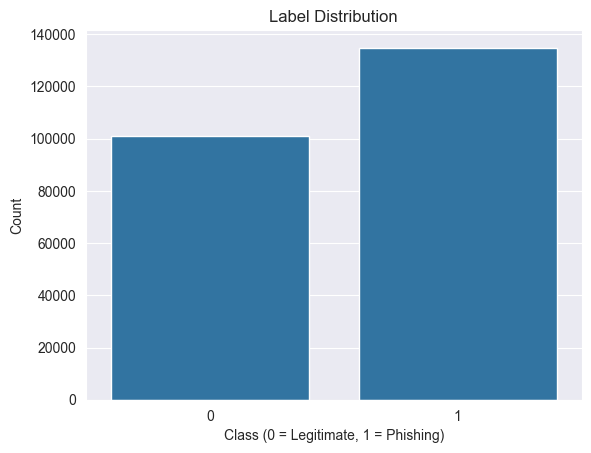

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.title("Label Distribution")
plt.xlabel("Class (0 = Legitimate, 1 = Phishing)")
plt.ylabel("Count")
plt.show()


### Balanced dataset

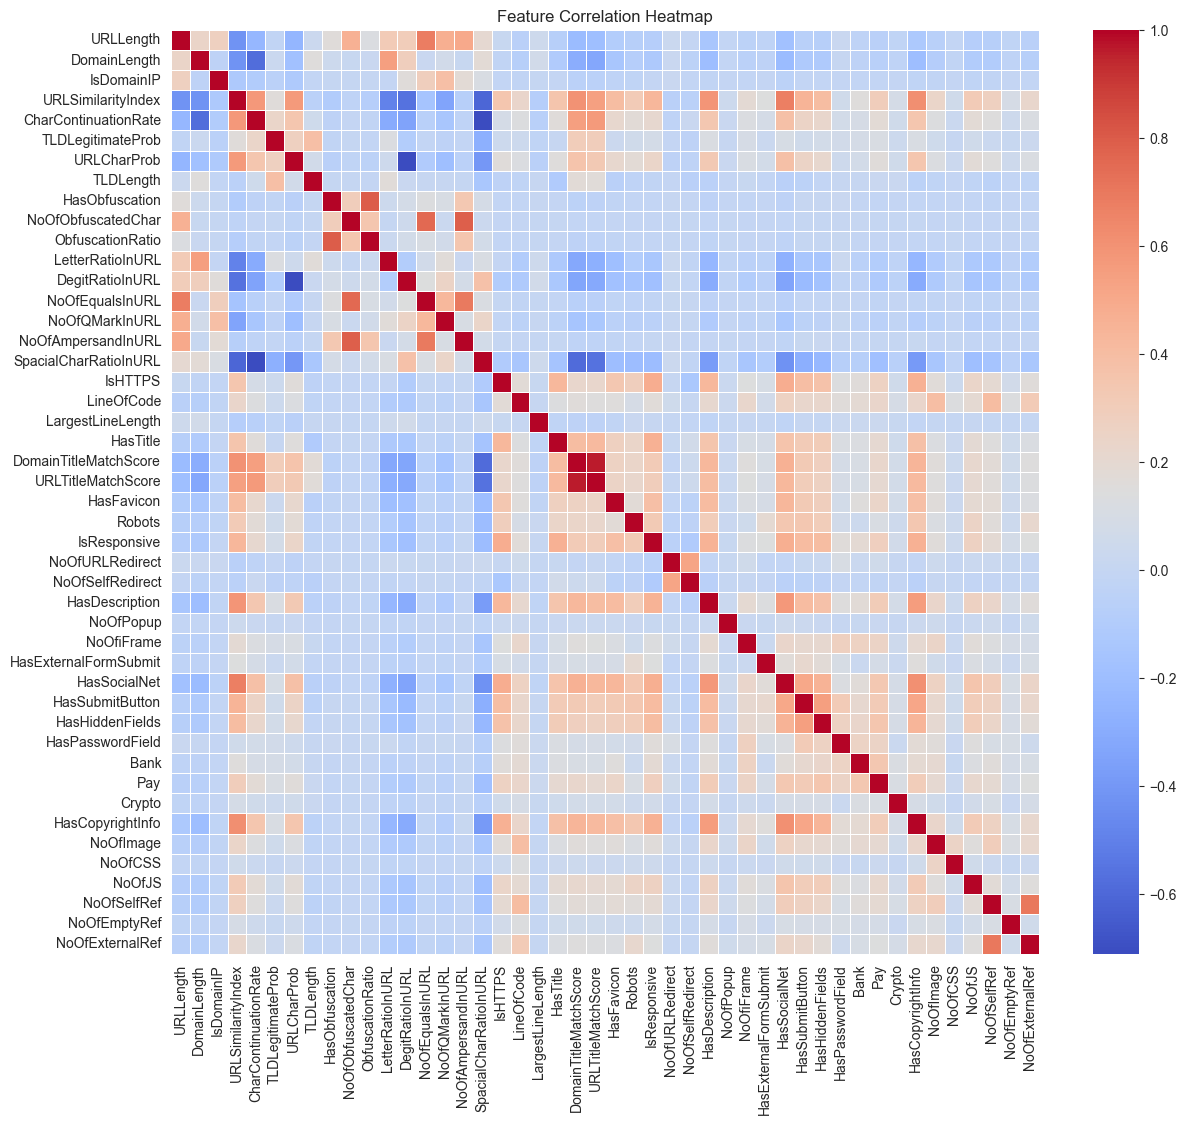

In [96]:
plt.figure(figsize=(14, 12))
corr = df.drop('label', axis=1).corr()
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


### The dataset does contain some multicollinearity, as seen in the correlation heatmap, but it’s not extreme thanks to your earlier feature pruning. Multicollinearity becomes a serious issue mainly for linear models like logistic regression, where it can distort coefficient estimates and reduce model performance. However, for tree-based models like Random Forest or XGBoost—which are commonly used in phishing detection, it’s not a concern, as these models can naturally handle redundant features. For my use case, continuing with a tree-based model is safe and recommended.

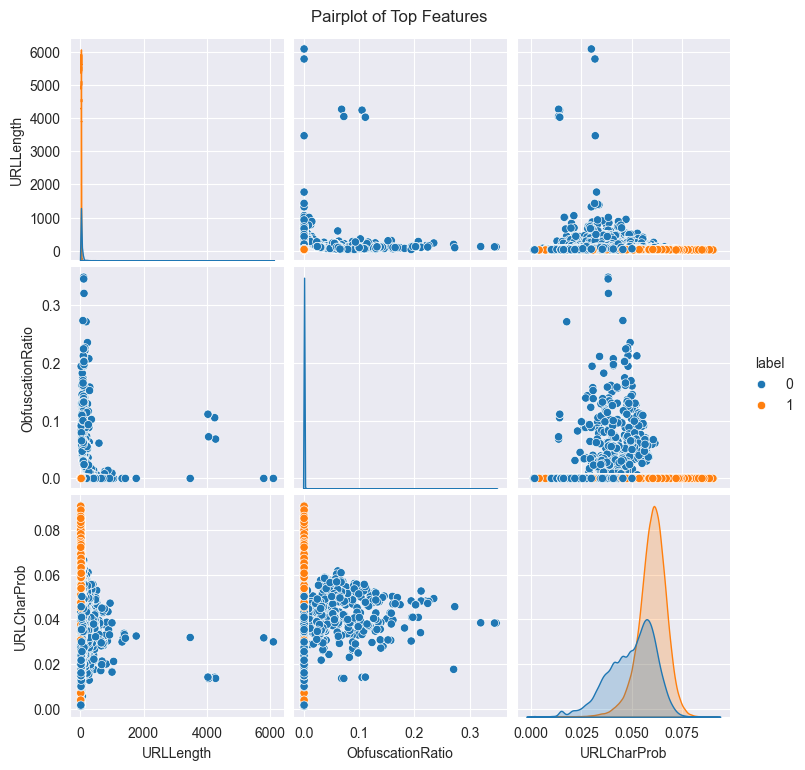

In [97]:
top_for_pairplot = df[['URLLength', 'ObfuscationRatio', 'URLCharProb', 'label']]
sns.pairplot(top_for_pairplot, hue='label', diag_kind='kde')
plt.suptitle("Pairplot of Top Features", y=1.02)
plt.show()


*The pairplot of the top features—URLLength, ObfuscationRatio, and URLCharProb—shows that URLCharProb is the most discriminative, with phishing URLs typically having lower character probabilities compared to legitimate ones. ObfuscationRatio also provides useful separation, as phishing URLs tend to have higher obfuscation. In contrast, URLLength shows weaker class distinction, with both classes overlapping heavily at lower lengths. The plots also reveal a strong concentration of data near zero for ObfuscationRatio and URLCharProb, indicating skewed distributions that may benefit from scaling or transformation if used in linear models. Overall, the selected features appear informative, particularly in combination, and show no obvious multicollinearity.*

<Figure size 1000x600 with 0 Axes>

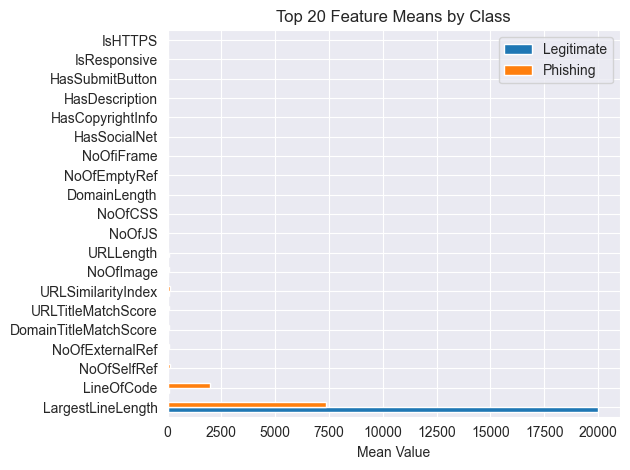

In [98]:
import matplotlib.pyplot as plt

class_means = df.groupby('label').mean().T
class_means.columns = ['Legitimate', 'Phishing']

# Plot top 20 features with highest mean difference
mean_diff = (class_means['Phishing'] - class_means['Legitimate']).abs().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
class_means.loc[mean_diff.index].plot(kind='barh')
plt.title("Top 20 Feature Means by Class")
plt.xlabel("Mean Value")
plt.tight_layout()
plt.show()


### This plot highlights how phishing sites often differ not only in superficial URL patterns but also in page complexity and structure, with inflated content lengths and external interactions. It also emphasizes the importance of scaling and normalization in model preparation to prevent a few features from dominating due to raw magnitude.

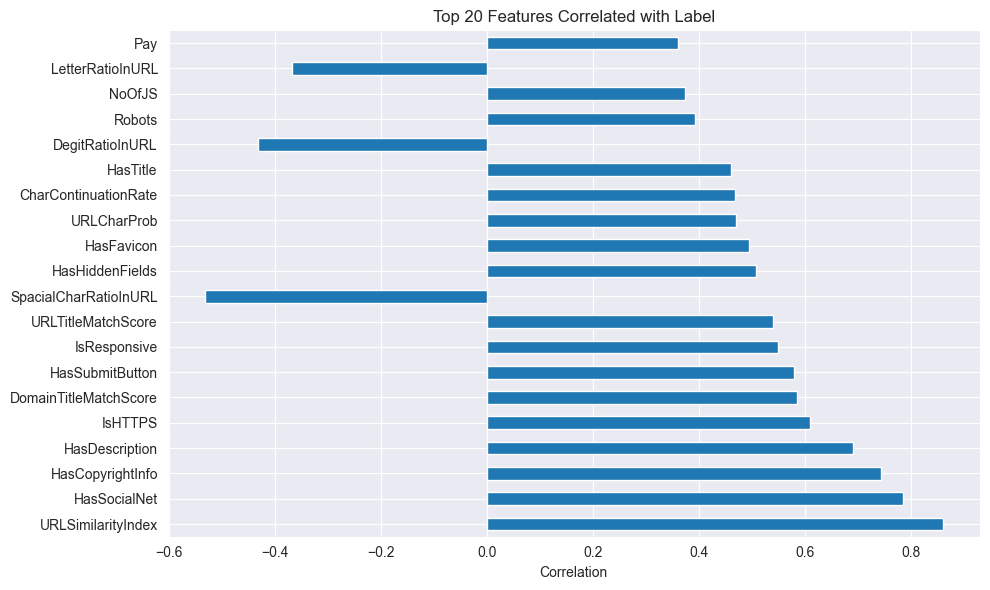

In [99]:
correlations = df.corr()['label'].drop('label').sort_values(key=abs, ascending=False)

plt.figure(figsize=(10, 6))
correlations.head(20).plot(kind='barh')
plt.title("Top 20 Features Correlated with Label")
plt.xlabel("Correlation")
plt.tight_layout()
plt.show()

### This plot confirms that a mix of URL structure, content characteristics, and site features are all important in distinguishing phishing sites. Notably, many of these features are interpretable and actionable, which is ideal for both modeling and explaining predictions. These insights also validate my earlier feature engineering choices.

# Preprocessing

## Handling Outliers

In [ ]:
#to show outliers for all numerical columns
for column in df.select_dtypes(include=['number']).columns:
    fig = px.box(df, x=column, title= f'Box plot for {column}')
    fig.show()

In [ ]:
import plotly.express as px

numerical_cols = df.select_dtypes(include=['number']).columns.drop('label')

for column in numerical_cols[:10]:  # limit to 10 at a time
    fig = px.box(df, x='label', y=column, points="outliers",
                 title=f'Box plot of {column} by Label')
    fig.show()


### The box plots reveal that several features in the dataset contain significant outliers, particularly URLLength, DomainLength, and NoOfObfuscatedChar, which are heavily right-skewed and show extreme values far from the main data distribution. These outliers can distort the behavior of many machine learning models—especially linear models or those sensitive to scale and range. Binary features like IsDomainIP and HasObfuscation showed rare positive values but no problematic outliers, and don’t require transformation. Features like URLSimilarityIndex and URLCharProb showed clear class separation and are useful, but may still benefit from normalization for stability.

### To make the data more suitable for modeling, especially if we are going to use algorithms sensitive to feature scales or distribution (like logistic regression, SVM, or KNN), it’s better to apply a log transformation to heavily skewed features and clip extreme values at the 95th percentile to reduce the influence of outliers without losing valuable data.

In [184]:
import numpy as np
import pandas as pd

# Step 1: Get all numeric columns except the target
num_cols = df.select_dtypes(include=['number']).columns.drop('label')

# Step 2: Calculate skewness
skewed = df[num_cols].skew()
high_skew_cols = skewed[skewed > 1].index.tolist()

print("Highly skewed features:\n", high_skew_cols)

# Step 3: Updated list of binary features to exclude
binary_features = [
    'IsDomainIP', 'HasObfuscation', 'Robots', 'HasExternalFormSubmit',
    'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'IsHTTPS', 'IsResponsive',
    'HasFavicon', 'HasTitle', 'HasDescription', 'HasSocialNet',
    'HasSubmitButton', 'HasHiddenFields'
]

# Step 4: Final list of features to log-transform (exclude binary)
cols_to_transform = [col for col in high_skew_cols if col not in binary_features]

print("Columns selected for log1p transformation:\n", cols_to_transform)

# Step 5: Apply log1p transformation
df[cols_to_transform] = df[cols_to_transform].apply(lambda col: np.log1p(col))

# Step 6: Clip transformed values at 95th percentile to reduce outlier impact
for col in cols_to_transform:
    upper = df[col].quantile(0.95)
    df[col] = np.where(df[col] > upper, upper, df[col])


Highly skewed features:
 ['URLLength', 'DomainLength', 'IsDomainIP', 'TLDLength', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'SpacialCharRatioInURL', 'LineOfCode', 'LargestLineLength', 'Robots', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef']
Columns selected for log1p transformation:
 ['URLLength', 'DomainLength', 'TLDLength', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'SpacialCharRatioInURL', 'LineOfCode', 'LargestLineLength', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'NoOfPopup', 'NoOfiFrame', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef']


### We use log1p to safely transform skewed numeric features that may contain zeros. It improves model performance by reducing the impact of outliers, compressing extreme values, and making the data more normally distributed — especially beneficial for linear or distance-based models.

In [185]:
# Split features and target
X = df.drop('label', axis=1)
y = df['label']


### Splitted the data to freatures and target

In [186]:
from sklearn.model_selection import train_test_split

# First split into train (60%) and temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# Then split temp into validation (20%) and test (20%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Confirm the shape of splits
print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")


Train: (141477, 46), Validation: (47159, 46), Test: (47159, 46)


### splitted the data to test and train

In [187]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transform to validation and test
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


# Model selection

### 1-Random Forest

In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Train a baseline model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 2: Evaluate on validation set
y_val_pred = model.predict(X_val)

print("📊 Validation Set Evaluation")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))


📊 Validation Set Evaluation
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20189
           1       1.00      1.00      1.00     26970

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159

Confusion Matrix:
 [[20189     0]
 [    0 26970]]


### This is almost certainly a sign of data leakage, overfitting, or a trivial pattern the model is exploiting.

In [189]:
# Correlation with label
correlations = df.corr()['label'].sort_values(ascending=False)
print(correlations.head(10))


label                 1.000000
NoOfSelfRef           0.870948
NoOfImage             0.867487
URLSimilarityIndex    0.860358
NoOfExternalRef       0.858827
LineOfCode            0.855467
NoOfJS                0.850318
HasSocialNet          0.784255
NoOfCSS               0.778897
HasCopyrightInfo      0.743358
Name: label, dtype: float64


In [190]:
importances = pd.Series(model.feature_importances_, index=X_train.columns)
print(importances.sort_values(ascending=False).head(10))


URLSimilarityIndex    0.209835
NoOfSelfRef           0.146732
NoOfExternalRef       0.113891
NoOfImage             0.102041
LineOfCode            0.101840
NoOfJS                0.047161
HasSocialNet          0.032645
HasCopyrightInfo      0.032068
LargestLineLength     0.032036
HasDescription        0.028078
dtype: float64


### I will consider using NN as it learns patterns more flexibly and may generalize better, especially when regularized correctly.

### 2- Neural Network

In [191]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping


# Step 4: Define the neural network model
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Step 5: Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Step 6: Set up early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Step 7: Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=10,
    batch_size=256,
    callbacks=[early_stop],
    verbose=1
)

# Step 8: Evaluate on test set
y_test_pred_prob = model.predict(X_test_scaled)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

print("\n📊 Test Set Evaluation")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Epoch 1/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9690 - loss: 0.0736 - val_accuracy: 0.9998 - val_loss: 2.8116e-04
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9997 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 1.6014e-04
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9998 - loss: 6.3289e-04 - val_accuracy: 0.9999 - val_loss: 1.7198e-04
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9998 - loss: 5.5170e-04 - val_accuracy: 1.0000 - val_loss: 4.8203e-05
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9999 - loss: 2.8333e-04 - val_accuracy: 1.0000 - val_loss: 2.5416e-05
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.8333e-04 - val_accuracy: 1.0000 - val_loss: 1.5501e-04
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9999 - loss: 1.8520e-04 - val_accuracy: 1.0000 - val_loss: 1.9767e-05
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - ac

### Still gives us overfitting, which strongly suggests data leakage
### So we are going to drop the highly correlated features which are the features extracted by the content of the URL this also increase the security of our extension and make it more secure by not interacting with the URLs which may contain malwares.

In [192]:
features_to_drop = [
    'URLSimilarityIndex',
    'LineOfCode',
    'LargestLineLength',
    'HasTitle',
    'Title',
    'DomainTitleMatchScore',
    'URLTitleMatchScore',
    'HasFavicon',
    'Robots',
    'IsResponsive',
    'NoOfURLRedirect',
    'NoOfSelfRedirect',
    'HasDescription',
    'NoOfPopup',
    'NoOfiFrame',
    'HasExternalFormSubmit',
    'HasSocialNet',
    'HasSubmitButton',
    'HasHiddenFields',
    'HasPasswordField',
    'HasCopyrightInfo',
    'NoOfImage',
    'NoOfCSS',
    'NoOfJS',
    'NoOfSelfRef',
    'NoOfEmptyRef',
    'NoOfExternalRef'
]

df = df.drop(columns=features_to_drop, errors='ignore')

### Resplitting the data

In [193]:
from sklearn.model_selection import train_test_split

X = df.drop('label', axis=1)
y = df['label']

# Split into train (60%), temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# Split temp into validation (20%) and test (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)


### Rescale the data

In [194]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [195]:
from sklearn.ensemble import RandomForestClassifier

RandomForestModel = RandomForestClassifier(n_estimators=100, random_state=42)
RandomForestModel.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [196]:
from sklearn.metrics import classification_report, accuracy_score

y_val_pred = RandomForestModel.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))


Validation Accuracy: 0.9963315591933671
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     20189
           1       1.00      1.00      1.00     26970

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159


In [197]:
y_test_pred = RandomForestModel.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))


Test Accuracy: 0.9964587883542908


In [198]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping


# Step 4: Define the neural network model
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Step 5: Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Step 6: Set up early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Step 7: Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=10,
    batch_size=256,
    callbacks=[early_stop],
    verbose=1
)

# Step 8: Evaluate on test set
y_test_pred_prob = model.predict(X_test_scaled)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

print("\n📊 Test Set Evaluation")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Epoch 1/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9524 - loss: 0.1220 - val_accuracy: 0.9967 - val_loss: 0.0156
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9956 - loss: 0.0222 - val_accuracy: 0.9969 - val_loss: 0.0144
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9963 - loss: 0.0188 - val_accuracy: 0.9969 - val_loss: 0.0144
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9963 - loss: 0.0191 - val_accuracy: 0.9969 - val_loss: 0.0143
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9966 - loss: 0.0169 - val_accuracy: 0.9971 - val_loss: 0.0136
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9965 - loss: 0.0175 - val_accuracy: 0.9972 - val_loss: 0.0136
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9967 - loss: 0.0176 - val_accuracy: 0.9972 - val_loss: 0.0133
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9968 - loss: 0.0161 - val_accuracy: 0.

# Save model

In [199]:
model.save("temp_model.keras")  # Save using the recommended format

In [200]:
import joblib

# Save model
model.save("phishing_model.keras")

# Bundle only path, not bytes
bundle = {
    'model_path': "phishing_model.keras",
    'scaler': scaler,
    'feature_names': list(X.columns)
}
joblib.dump(bundle, "phishing_model_bundle.pkl")


['phishing_model_bundle.pkl']

In [201]:
print("Class distribution:", np.bincount(y_train))


Class distribution: [60567 80910]


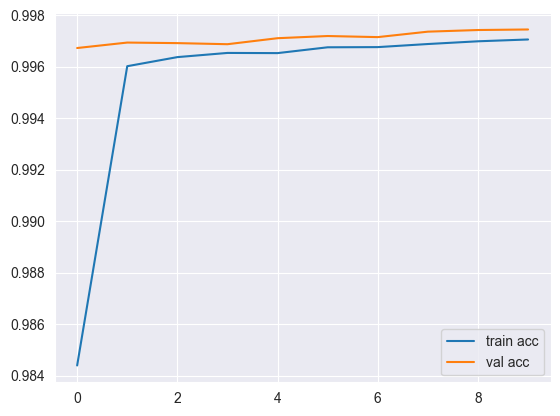

In [202]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [235]:
import re
from urllib.parse import urlparse
from collections import Counter
import numpy as np
import pandas as pd

# Static lookup for TLD legitimacy probability
TLD_PROBABILITY_MAP = {
    'com': 0.95,
    'org': 0.0799628,
    'net': 0.90,
    'gov': 0.98,
    'edu': 0.97,
    'io': 0.85,
    'co': 0.85,
    'us': 0.80,
    'biz': 0.75,
    'info': 0.70,
    'xyz': 0.40,
    'top': 0.30,
    'tk': 0.20,
    'ml': 0.20,
    'gq': 0.10,
    'cf': 0.10
}

def extract_all_features_df(url):
    parsed = urlparse(url)
    domain = parsed.netloc
    path = parsed.path
    url_for_stats = domain + path

    features = {}

    # Ensure correct URL length (without trailing slash error)
    features['URLLength'] = len(url)
    features['DomainLength'] = len(domain)
    features['IsDomainIP'] = int(bool(re.match(r'^\d+\.\d+\.\d+\.\d+$', domain)))
    features['CharContinuationRate'] = len(re.findall(r'(.)\1{2,}', url_for_stats))

    # TLD
    tld = domain.split('.')[-1].lower() if '.' in domain else ''
    features['TLDLegitimateProb'] = TLD_PROBABILITY_MAP.get(tld, 0.5)

    # URLCharProb: expected = 0.060614474 -> 1 / unique_char_count
    if len(url_for_stats) > 0:
        unique_chars = len(set(url_for_stats))
        features['URLCharProb'] = 1.0 / unique_chars if unique_chars > 0 else 0.0
    else:
        features['URLCharProb'] = 0.0

    features['TLDLength'] = len(tld)

    features['NoOfObfuscatedChar'] = url.count('\\')
    features['HasObfuscation'] = int(features['NoOfObfuscatedChar'] > 0)
    features['ObfuscationRatio'] = features['NoOfObfuscatedChar'] / len(url) if len(url) > 0 else 0

    features['LetterRatioInURL'] = sum(c.isalpha() for c in url_for_stats) / len(url_for_stats) if len(url_for_stats) > 0 else 0
    features['DegitRatioInURL'] = sum(c.isdigit() for c in url_for_stats) / len(url_for_stats) if len(url_for_stats) > 0 else 0

    features['NoOfEqualsInURL'] = url.count('=')
    features['NoOfQMarkInURL'] = url.count('?')
    features['NoOfAmpersandInURL'] = url.count('&')

    special_chars = re.findall(r'[^A-Za-z0-9]', url_for_stats)
    features['SpacialCharRatioInURL'] = len(special_chars) / len(url_for_stats) if len(url_for_stats) > 0 else 0

    features['IsHTTPS'] = int(parsed.scheme == 'https')

    lower_url = url.lower()
    features['Bank'] = int('bank' in lower_url)
    features['Pay'] = int('pay' in lower_url)
    features['Crypto'] = int('crypto' in lower_url)

    ordered_features = [
        'URLLength', 'DomainLength', 'IsDomainIP', 'CharContinuationRate',
        'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'HasObfuscation',
        'NoOfObfuscatedChar', 'ObfuscationRatio', 'LetterRatioInURL',
        'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
        'NoOfAmpersandInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
        'Bank', 'Pay', 'Crypto'
    ]
    
    return pd.DataFrame([[features[feature] for feature in ordered_features]], 
                        columns=ordered_features)

def process_url_prediction(url, model, scaler, X_columns=None):
    """
    Complete pipeline to process a URL and make predictions.
    
    Args:
        url (str): URL to analyze
        model: Trained model for prediction
        scaler: Fitted scaler for feature transformation
        X_columns (list): List of expected column names for the model
        
    Returns:
        tuple: (prediction_probability, predicted_class)
    """
    # Extract features
    features_df = extract_all_features_df(url)
    
    # If X_columns is provided, ensure we have the right columns in the right order
    if X_columns is not None:
        # Check if all required columns are present
        missing_cols = set(X_columns) - set(features_df.columns)
        if missing_cols:
            raise ValueError(f"Missing columns in features: {missing_cols}")
        
        # Reorder columns to match training data
        features_df = features_df[X_columns]
    
    # Define columns that need log transformation
    cols_to_transform = [
        'URLLength', 'DomainLength', 'TLDLength', 'NoOfObfuscatedChar',
        'ObfuscationRatio', 'DegitRatioInURL', 'NoOfEqualsInURL',
        'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'SpacialCharRatioInURL'
    ]
    
    # Apply log1p transformation to specified columns
    for col in cols_to_transform:
        if col in features_df.columns:
            features_df[col] = np.log1p(features_df[col])
    
    # Scale features
    scaled_features = scaler.transform(features_df)
    
    # Make prediction
    predictions = model.predict(scaled_features)
    predicted_class = int(predictions[0][0] > 0.5)
    
    return predictions[0][0], predicted_class

# Test with the URL
newDf = extract_all_features_df("https://www.globalreporting.org")
print("Feature values as list:")
print(newDf.iloc[0].tolist())

# test_url = "https://www.globalreporting.org"
# features_df = extract_all_features_df(test_url)
# print("Extracted features:")
# print(features_df.to_dict('records')[0])
# 
# prediction_prob, predicted_class = process_url_prediction(
#     "https://www.globalreporting.org/", 
#     model, 
#     scaler, 
#     list(X.columns)
# )
# prediction_prob
#predicted_class


# For the full prediction pipeline, you would call:
# prediction_prob, predicted_class = process_url_prediction(
#     test_url, model, scaler, X_columns
# )
# print(f"Prediction probability: {prediction_prob}")
# print(f"Predicted class: {predicted_class}")


newDf = extract_all_features_df("https://www.globalreporting.org")
features_df = newDf[list(X.columns)]

cols_to_transform = ['URLLength', 'DomainLength', 'TLDLength', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'SpacialCharRatioInURL']

# Step 5: Apply log1p transformation
features_df[cols_to_transform] = features_df[cols_to_transform].apply(lambda col: np.log1p(col))

scaled_features = scaler.transform(features_df)
#scaled_features[0][7] = -0.045399
predictions = model.predict(scaled_features)
print("Prediction:", predictions)
print("Predicted class:", int(predictions[0][0] > 0.5))
# [
#     30, 23, 0, 1, 0.0799628,
#     0.060614474, 3, 0, 0, 0,
#     0.567, 0, 0, 0, 0,
#     0.033, 1, 0, 0, 0
# ]

Feature values as list:
[31.0, 23.0, 0.0, 1.0, 0.0799628, 0.07692307692307693, 3.0, 0.0, 0.0, 0.0, 0.9130434782608695, 0.0, 0.0, 0.0, 0.0, 0.08695652173913043, 1.0, 0.0, 0.0, 0.0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Prediction: [[1.8684322e-37]]
Predicted class: 0


In [231]:
features_df

,URLLength,DomainLength,IsDomainIP,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,LetterRatioInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,SpacialCharRatioInURL,IsHTTPS,Bank,Pay,Crypto
0,3.465736,3.178054,0,1,0.079963,0.076923,1.386294,0,0.0,0.0,0.83871,0.0,0.0,0.0,0.0,0.149532,1,0,0,0


In [206]:
type(X_val_scaled)


numpy.ndarray

In [207]:
#y_test_pred_prob = model.predict(X_test_scaled)
X_test_scaled

array([[ 1.74551166,  1.97736409, -0.05311416, ..., -0.38048073,
        -0.55848334, -0.15458729],
       [-0.99408774, -1.03006018, -0.05311416, ..., -0.38048073,
        -0.55848334, -0.15458729],
       [ 0.56027754,  1.15158575, -0.05311416, ..., -0.38048073,
        -0.55848334, -0.15458729],
       ...,
       [-0.38177701, -0.12459531, -0.05311416, ..., -0.38048073,
         1.79056372, -0.15458729],
       [ 0.93924993,  1.63676727, -0.05311416, ...,  2.62825398,
         1.79056372, -0.15458729],
       [ 0.56027754,  0.93443415, -0.05311416, ..., -0.38048073,
        -0.55848334, -0.15458729]])

In [208]:
input_values = [
    0.560278, 1.151586, -0.053114, 0.713998, -0.716219,
    0.566231, 0.645531, -0.045399, 0.0, 0.0,
    0.999030, -0.461516, 0.0, 0.0, 0.0,
    -1.167377, 0.526555, -0.380481, -0.558483, -0.154587
]

import numpy as np

# Step 1: Convert to 2D array
input_array = np.array(input_values).reshape(1, -1)

# Step 2: Predict using the loaded model
prediction_prob = model.predict(input_array)
prediction_class = int(prediction_prob[0][0] > 0.5)

# Step 3: Output result
print("Prediction probability:", prediction_prob[0][0])
print("Predicted class:", prediction_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction probability: 0.9937635
Predicted class: 1


In [209]:
input_values = [
    30, 23, 0, 1, 0.0799628,
    0.060614474, 3, 0, 0, 0,
    0.567, 0, 0, 0, 0,
    0.033, 1, 0, 0, 0
]


# Step 1: Convert to 2D array
input_array = np.array(input_values).reshape(1, -1)

# Step 1: Create DataFrame from input
features_df = pd.DataFrame([input_values], columns=list(X.columns))

cols_to_transform = ['URLLength', 'DomainLength', 'TLDLength', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'SpacialCharRatioInURL']

# Step 5: Apply log1p transformation
features_df[cols_to_transform] = features_df[cols_to_transform].apply(lambda col: np.log1p(col))

scaled_features = scaler.transform(features_df)
#scaled_features[0][7] = -0.045399
predictions = model.predict(scaled_features)
print("Prediction:", predictions)
print("Predicted class:", int(predictions[0][0] > 0.5))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction: [[0.9975329]]
Predicted class: 1
